## Part 1- Data Coding and Merging

In [81]:
#Import Libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Import NHL Team Data and Display
NHL_Team=pd.read_csv("NHL_team.csv")
NHL_Team.drop(columns=['Unnamed: 0', 'abbr', 'tname', 'lname', 'sname'], inplace=True)
NHL_Team.rename(columns={'name':'team_name'}, inplace=True)
display(NHL_Team)

,tid,team_name,tricode
0,1,Toronto Maple Leafs,TOR
1,2,Montréal Canadiens,MTL
2,4,Winnipeg Jets,WPG
3,5,Washington Capitals,WSH
4,6,Chicago Blackhawks,CHI
5,7,St. Louis Blues,STL
6,8,Pittsburgh Penguins,PIT
7,10,Edmonton Oilers,EDM
8,11,Calgary Flames,CGY
9,14,Philadelphia Flyers,PHI


In [83]:
#Import NHL Competition Data and Display Head
NHL_Competition=pd.read_csv("NHL_competition.csv")
NHL_Competition.drop(columns=['Unnamed: 0', 'tz', 'start', 'end'], inplace=True)
NHL_Competition.rename(columns={'name':'competition_name'}, inplace=True)
NHL_Competition.head()

,comp_id,year,type,competition_name
0,1,2013,2,2013 NHL Regular Season
1,2,2017,2,2017 NHL Regular Season
2,2453,2013,3,2013 NHL Playoff
3,2541,2017,3,2017 NHL Playoff
4,2661,2012,2,2012 NHL Regular Season


In [84]:
#Import NHL Game Data and Display Head
NHL_Game=pd.read_csv("NHL_game.csv")
NHL_Game.drop(columns=['X', 'period', 'status'], inplace=True)
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid
0,37,2,10/7/2017,NaN,NaN,away,25
1,67,2,10/9/2017,NaN,NaN,away,29
2,154,1,10/14/2013,NaN,NaN,away,29
3,278,1,10/24/2013,NaN,NaN,away,53
4,291,1,10/25/2013,NaN,NaN,away,5


In [85]:
NHL_Game = pd.merge(NHL_Team, NHL_Game, on='tid')

In [86]:
NHL_Game

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away
0,1,Toronto Maple Leafs,TOR,741,1,11/28/2013,NaN,NaN,away
1,1,Toronto Maple Leafs,TOR,782,1,12/1/2013,NaN,NaN,away
2,1,Toronto Maple Leafs,TOR,5225,5181,4/25/2017,NaN,NaN,away
3,1,Toronto Maple Leafs,TOR,6557,5385,1/7/2016,NaN,NaN,away
4,1,Toronto Maple Leafs,TOR,6914,5385,2/7/2016,NaN,NaN,away
...,...,...,...,...,...,...,...,...,...
18941,11366,Atlanta Thrashers,ATL,7358,5662,2/13/2011,3.0,2.0,home
18942,11366,Atlanta Thrashers,ATL,7786,5662,3/17/2011,3.0,5.0,home
18943,11366,Atlanta Thrashers,ATL,7630,5662,3/6/2011,3.0,4.0,home
18944,11366,Atlanta Thrashers,ATL,6105,5662,11/12/2010,1.0,5.0,home


In [87]:
NHL_Game = pd.merge(NHL_Competition, NHL_Game, on='comp_id')

In [88]:
NHL_Game

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away
0,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,741,11/28/2013,NaN,NaN,away
1,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,782,12/1/2013,NaN,NaN,away
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1003,12/17/2013,1.0,3.0,away
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1552,1/26/2014,4.0,5.0,away
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1811,3/2/2014,3.0,4.0,away
...,...,...,...,...,...,...,...,...,...,...,...,...
18941,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9431,4/26/2015,4.0,7.0,away
18942,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9428,4/20/2015,2.0,4.0,away
18943,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9430,4/24/2015,1.0,2.0,home
18944,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9426,4/16/2015,2.0,1.0,home


In [89]:
NHL_Game['hgd'] = NHL_Game['hscore'] - NHL_Game['ascore']
NHL_Game.dropna(subset=['hgd'], inplace=True)

In [90]:
NHL_Game.dropna(inplace=True)

In [91]:
NHL_Game.shape

(18506, 13)

In [92]:
NHL_Game['date']=pd.to_datetime(NHL_Game['date'])
NHL_Game.sort_values(by=['date']).head(n=20)

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away,hgd
15183,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,3.0,home,-1.0
14163,5662,2010,2,2010 NHL Regular Season,14,Philadelphia Flyers,PHI,5664,2010-10-07,3.0,2.0,away,-1.0
15794,5662,2010,2,2010 NHL Regular Season,66,Carolina Hurricanes,CAR,5666,2010-10-07,4.0,3.0,away,-1.0
13955,5662,2010,2,2010 NHL Regular Season,8,Pittsburgh Penguins,PIT,5664,2010-10-07,3.0,2.0,home,-1.0
13611,5662,2010,2,2010 NHL Regular Season,2,Montréal Canadiens,MTL,5662,2010-10-07,2.0,3.0,away,1.0
13564,5662,2010,2,2010 NHL Regular Season,1,Toronto Maple Leafs,TOR,5662,2010-10-07,2.0,3.0,home,1.0
14796,5662,2010,2,2010 NHL Regular Season,22,Colorado Avalanche,COL,5668,2010-10-08,3.0,4.0,home,1.0
15675,5662,2010,2,2010 NHL Regular Season,52,Columbus Blue Jackets,CBJ,5672,2010-10-08,3.0,2.0,home,-1.0
14664,5662,2010,2,2010 NHL Regular Season,21,Anaheim Ducks,ANA,5679,2010-10-08,0.0,4.0,away,4.0
13672,5662,2010,2,2010 NHL Regular Season,5,Washington Capitals,WSH,5683,2010-10-08,2.0,4.0,away,2.0


In [93]:
NHL_Home = NHL_Game[NHL_Game.home_away == 'home']
NHL_Away = NHL_Game[NHL_Game.home_away == 'away']
NHL_Away

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away,hgd
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1003,2013-12-17,1.0,3.0,away,2.0
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1552,2014-01-26,4.0,5.0,away,1.0
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1811,2014-03-02,3.0,4.0,away,1.0
5,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1940,2014-03-11,3.0,1.0,away,-2.0
6,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1522,2014-01-24,1.0,7.0,away,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9403,2015-04-15,4.0,1.0,away,-3.0
18936,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9409,2015-04-27,1.0,2.0,away,1.0
18940,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9429,2015-04-22,1.0,3.0,away,2.0
18941,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9431,2015-04-26,4.0,7.0,away,3.0


In [94]:
NHL_Home

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away,hgd
42,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,307,2013-10-26,1.0,4.0,home,3.0
43,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,682,2013-11-24,2.0,3.0,home,1.0
44,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2150,2014-03-25,5.0,3.0,home,-2.0
45,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2067,2014-03-19,5.0,3.0,home,-2.0
46,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2281,2014-04-03,3.0,4.0,home,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18938,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9408,2015-04-25,1.0,3.0,home,2.0
18939,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9406,2015-04-21,2.0,1.0,home,-1.0
18943,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9430,2015-04-24,1.0,2.0,home,1.0
18944,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9426,2015-04-16,2.0,1.0,home,-1.0


In [95]:
NHL_Away.rename(columns={'ascore':'goals_for', 'hscore':'goals_against'}, inplace=True)
NHL_Home.rename(columns={'hscore':'goals_for', 'ascore':'goals_against'}, inplace=True)
NHL_Away['win'] = np.where(NHL_Away.hgd < 0, 1, np.where(NHL_Away.hgd > 0, 0, 0.5))
NHL_Home['win'] = np.where(NHL_Home.hgd > 0, 1, np.where(NHL_Home.hgd < 0, 0, 0.5))

/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_91894/3245461921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Away.rename(columns={'ascore':'goals_for', 'hscore':'goals_against'}, inplace=True)
/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_91894/3245461921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Home.rename(columns={'hscore':'goals_for', 'ascore':'goals_against'}, inplace=True)
/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_91894/3245461921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [96]:
NHL_Home

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_against,goals_for,home_away,hgd,win
42,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,307,2013-10-26,1.0,4.0,home,3.0,1.0
43,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,682,2013-11-24,2.0,3.0,home,1.0,1.0
44,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2150,2014-03-25,5.0,3.0,home,-2.0,0.0
45,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2067,2014-03-19,5.0,3.0,home,-2.0,0.0
46,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2281,2014-04-03,3.0,4.0,home,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18938,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9408,2015-04-25,1.0,3.0,home,2.0,1.0
18939,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9406,2015-04-21,2.0,1.0,home,-1.0,0.0
18943,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9430,2015-04-24,1.0,2.0,home,1.0,1.0
18944,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9426,2015-04-16,2.0,1.0,home,-1.0,0.0


In [97]:
NHL_Away

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_for,goals_against,home_away,hgd,win
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1003,2013-12-17,1.0,3.0,away,2.0,0.0
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1552,2014-01-26,4.0,5.0,away,1.0,0.0
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1811,2014-03-02,3.0,4.0,away,1.0,0.0
5,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1940,2014-03-11,3.0,1.0,away,-2.0,1.0
6,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1522,2014-01-24,1.0,7.0,away,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9403,2015-04-15,4.0,1.0,away,-3.0,1.0
18936,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9409,2015-04-27,1.0,2.0,away,1.0,0.0
18940,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9429,2015-04-22,1.0,3.0,away,2.0,0.0
18941,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9431,2015-04-26,4.0,7.0,away,3.0,0.0


In [98]:
NHL_Game = pd.concat([NHL_Home, NHL_Away], ignore_index=True)
NHL_Game

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_against,goals_for,home_away,hgd,win
0,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,307,2013-10-26,1.0,4.0,home,3.0,1.0
1,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,682,2013-11-24,2.0,3.0,home,1.0,1.0
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2150,2014-03-25,5.0,3.0,home,-2.0,0.0
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2067,2014-03-19,5.0,3.0,home,-2.0,0.0
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2281,2014-04-03,3.0,4.0,home,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9403,2015-04-15,1.0,4.0,away,-3.0,1.0
18502,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9409,2015-04-27,2.0,1.0,away,1.0,0.0
18503,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9429,2015-04-22,3.0,1.0,away,2.0,0.0
18504,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9431,2015-04-26,7.0,4.0,away,3.0,0.0


In [99]:
NHL_Team_Stats = NHL_Game.groupby(['tid','competition_name','type'])['win','goals_for','goals_against'].sum().reset_index()
NHL_Team_Stats

/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_91894/4257217415.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NHL_Team_Stats = NHL_Game.groupby(['tid','competition_name','type'])['win','goals_for','goals_against'].sum().reset_index()


,tid,competition_name,type,win,goals_for,goals_against
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0
2,1,2012 NHL Playoff,3,3.0,18.0,22.0
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0
...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0


In [100]:
NHL_Game_Count = NHL_Game.groupby(['tid','competition_name','type'])['win'].count().reset_index()
NHL_Game_Count.rename(columns={'win':'count'}, inplace=True)
NHL_Game_Count

,tid,competition_name,type,count
0,1,2010 NHL Regular Season,2,82
1,1,2011 NHL Regular Season,2,40
2,1,2012 NHL Playoff,3,7
3,1,2012 NHL Regular Season,2,46
4,1,2013 NHL Regular Season,2,79
...,...,...,...,...
364,66,2014 NHL Regular Season,2,82
365,66,2015 NHL Regular Season,2,81
366,66,2016 NHL Regular Season,2,82
367,66,2017 NHL Regular Season,2,80


In [101]:
NHL_Team_Stats = pd.merge(NHL_Team_Stats, NHL_Game_Count, on=['tid','competition_name','type'])
NHL_Team_Stats = pd.merge(NHL_Team_Stats, NHL_Team, on='tid')

In [102]:
NHL_Team_Stats

,tid,competition_name,type,win,goals_for,goals_against,count,team_name,tricode
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR
...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0,82,Carolina Hurricanes,CAR
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0,81,Carolina Hurricanes,CAR
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0,82,Carolina Hurricanes,CAR
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0,80,Carolina Hurricanes,CAR


In [103]:
#Import NHL PPPK Data and Display Head
NHL_PPPK=pd.read_csv("pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


Create new variables in the “NHL_Team_Stats” dataframe.
a) Winning percentage (“win_pct”)=”win”/ total number of games played
b) Average goals for per game (“avg_gf”)=total number of goals for / total number of games played     
c) Average goals against per game (“avg_ga”)=total number of goals against / total number of games played

In [104]:
NHL_Team_Stats = pd.merge(NHL_Team_Stats, NHL_PPPK, on=['tricode', 'competition_name'])
NHL_Team_Stats['win_pct'] = NHL_Team_Stats['win'] / NHL_Team_Stats['count']
NHL_Team_Stats['avg_gf'] = NHL_Team_Stats['goals_for'] / NHL_Team_Stats['count']
NHL_Team_Stats['avg_ga'] = NHL_Team_Stats['goals_against'] / NHL_Team_Stats['count']
NHL_Team_Stats

,tid,competition_name,type,win,goals_for,goals_against,count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.719512,3.158537
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0,0.500000,3.225000,3.225000
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR,30,29,5.0,0.428571,2.571429,3.142857
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR,234,230,39.0,0.543478,3.130435,2.804348
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.924051,3.164557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0,82,Carolina Hurricanes,CAR,239,289,55.0,0.365854,2.329268,2.780488
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0,81,Carolina Hurricanes,CAR,247,281,48.0,0.419753,2.407407,2.790123
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0,82,Carolina Hurricanes,CAR,224,258,57.0,0.432927,2.670732,2.963415
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0,80,Carolina Hurricanes,CAR,218,255,51.0,0.443750,2.837500,3.100000


In [105]:
NHL_Team_R_Stats = NHL_Team_Stats[NHL_Team_Stats['type'] == 2]
NHL_Team_R_Stats

,tid,competition_name,type,win,goals_for,goals_against,count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.719512,3.158537
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0,0.500000,3.225000,3.225000
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR,234,230,39.0,0.543478,3.130435,2.804348
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.924051,3.164557
5,1,2014 NHL Regular Season,2,29.0,209.0,258.0,78,Toronto Maple Leafs,TOR,319,343,54.0,0.371795,2.679487,3.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0,82,Carolina Hurricanes,CAR,239,289,55.0,0.365854,2.329268,2.780488
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0,81,Carolina Hurricanes,CAR,247,281,48.0,0.419753,2.407407,2.790123
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0,82,Carolina Hurricanes,CAR,224,258,57.0,0.432927,2.670732,2.963415
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0,80,Carolina Hurricanes,CAR,218,255,51.0,0.443750,2.837500,3.100000


## Part 2 - Descriptive and Summary Analyses

In [106]:
NHL_Game['goals_for'].describe()

count    18506.000000
mean         2.825894
std          1.654729
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: goals_for, dtype: float64

In [107]:
NHL_Game[NHL_Game.home_away == 'home']['goals_against'].describe()

count    9253.000000
mean        2.689830
std         1.608916
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: goals_against, dtype: float64

In [108]:
NHL_Game[NHL_Game.home_away == 'away']['goals_against'].describe()

count    9253.000000
mean        2.961958
std         1.688463
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: goals_against, dtype: float64

array([<AxesSubplot:title={'center':'away'}>,
       <AxesSubplot:title={'center':'home'}>], dtype=object)

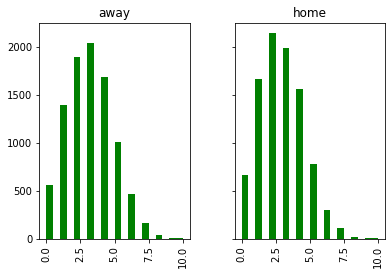

In [109]:
NHL_Game.hist(by='home_away', column='goals_against', color='green', bins=20, sharex=True, sharey=True)

## Part 3 - Correlation Analyses


Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

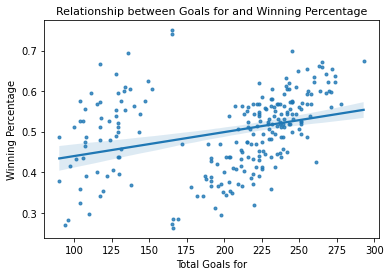

In [110]:
#NHL_Team_R_Stats.plot.scatter(x='goals_for', y='win_pct')
sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [111]:
NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])

0.31566456280848154

For the “NHL_Team_R_Stats” dataframe, delete observations of 2011 and 2012 seasons. Continue to name the dataframe “NHL_Team_R_Stats”.

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

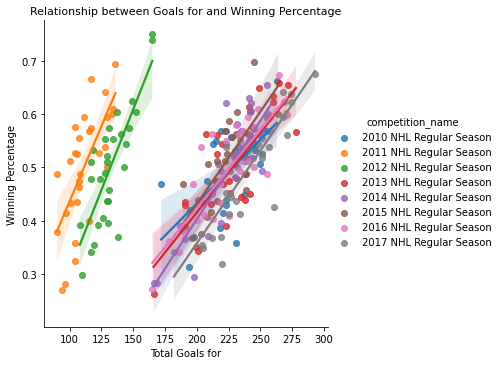

In [112]:
sns.lmplot(x='goals_for', y='win_pct', hue='competition_name', data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [113]:
NHL_Team_R_Stats = NHL_Team_R_Stats[(NHL_Team_R_Stats['competition_name'] != '2011 NHL Regular Season') & (NHL_Team_R_Stats['competition_name'] != '2012 NHL Regular Season')]
NHL_Team_R_Stats

,tid,competition_name,type,win,goals_for,goals_against,count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.719512,3.158537
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.924051,3.164557
5,1,2014 NHL Regular Season,2,29.0,209.0,258.0,78,Toronto Maple Leafs,TOR,319,343,54.0,0.371795,2.679487,3.307692
6,1,2015 NHL Regular Season,2,29.0,196.0,238.0,79,Toronto Maple Leafs,TOR,324,307,27.0,0.367089,2.481013,3.012658
8,1,2016 NHL Regular Season,2,40.0,255.0,246.0,82,Toronto Maple Leafs,TOR,321,321,69.0,0.487805,3.109756,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0,82,Carolina Hurricanes,CAR,239,289,55.0,0.365854,2.329268,2.780488
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0,81,Carolina Hurricanes,CAR,247,281,48.0,0.419753,2.407407,2.790123
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0,82,Carolina Hurricanes,CAR,224,258,57.0,0.432927,2.670732,2.963415
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0,80,Carolina Hurricanes,CAR,218,255,51.0,0.443750,2.837500,3.100000


Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

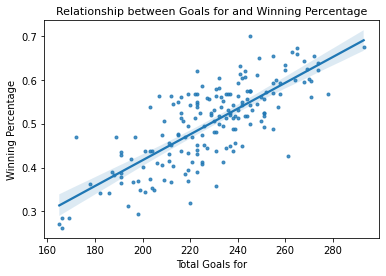

In [114]:
#NHL_Team_R_Stats.plot.scatter(x='goals_for', y='win_pct')
sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [115]:
NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])

0.7706255321801441

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

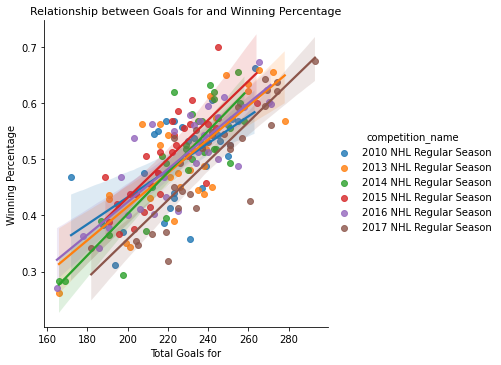

In [116]:
sns.lmplot(x='goals_for', y='win_pct', hue='competition_name', data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

## Uncomment this Section once your assignment is complete

In [117]:
#Save Dataframes as .csv files
#NHL_Game.to_csv("NHL_Game2.csv", index=False)
#NHL_Team_Stats.to_csv("NHL_Team_Stats.csv", index=False)
#NHL_Team_R_Stats.to_csv("NHL_Team_R_Stats.csv", index=False)